In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/CLENTS/dataset_02OCT-06OCT.xlsx")

In [ ]:
df.head()

In [ ]:
df.columns

In [ ]:
df.describe()

In [ ]:
df.sample(1)

latitude  longitude              time  pm10  pm2_5  carbon_monoxide  \
50  34.015858  71.975449  2023-10-02T10:00  25.6   15.9              243   

    nitrogen_dioxide  sulphur_dioxide  ozone  
50               2.4              3.0    152

In [ ]:
df.

# **MODEL 1**

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import EarlyStopping

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/CLENTS/dataset_02OCT-06OCT.xlsx")

In [ ]:
# 'time' column is in datetime format
df['time'] = pd.to_datetime(df['time'])
df.set_index('time', inplace=True)

In [ ]:
# Select relevant columns for modeling
features = ['pm10 (Î¼g/mÂ³)', 'pm2_5 (Î¼g/mÂ³)', 'carbon_monoxide (Î¼g/mÂ³)',
            'nitrogen_dioxide (Î¼g/mÂ³)', 'sulphur_dioxide (Î¼g/mÂ³)']

In [ ]:
# Normalize data using Min-Max scaling
scaler = MinMaxScaler()
df[features] = scaler.fit_transform(df[features])

In [ ]:
# Create sequences for time series data
sequence_length = 10
sequences = []
targets = []

In [ ]:
for i in range(len(df) - sequence_length):
    seq = df.iloc[i:i + sequence_length][features].values
    target = df.iloc[i + sequence_length][features].values
    sequences.append(seq)
    targets.append(target)

In [ ]:
X = np.array(sequences)
y = np.array(targets)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(X.shape[1], X.shape[2])))
model.add(Dense(len(features), activation='linear'))


In [ ]:

# Compile the model
model.compile(optimizer='adam', loss='mse')


In [ ]:

# Set up early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, callbacks=[early_stopping])


Epoch 1/50
4/4 [==============================] - 0s 54ms/step - loss: 0.0320 - val_loss: 0.0443
Epoch 2/50
4/4 [==============================] - 0s 64ms/step - loss: 0.0282 - val_loss: 0.0471
Epoch 3/50
4/4 [==============================] - 0s 35ms/step - loss: 0.0275 - val_loss: 0.0503
Epoch 4/50
4/4 [==============================] - 0s 31ms/step - loss: 0.0283 - val_loss: 0.0504
Epoch 5/50
4/4 [==============================] - 0s 19ms/step - loss: 0.0280 - val_loss: 0.0477
Epoch 6/50
4/4 [==============================] - 0s 20ms/step - loss: 0.0273 - val_loss: 0.0451


In [ ]:
# Evaluate the model on the test set
loss = model.evaluate(X_test, y_test)
print(f"Test Loss (MSE): {loss}")


2/2 [==============================] - 0s 7ms/step - loss: 0.0405
Test Loss (MSE): 0.04049886763095856


In [ ]:
# Make predictions
predictions = model.predict(X_test)


2/2 [==============================] - 0s 6ms/step


In [ ]:
# Calculate additional metrics
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 0.04049886489568453
Mean Absolute Error (MAE): 0.14486859188343698
R-squared (R2): -0.13093680179988273


# **Model 2**

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

df = pd.read_excel("/content/drive/MyDrive/CLENTS/dataset_02OCT-06OCT.xlsx")

# 'time' column is in datetime format
df['time'] = pd.to_datetime(df['time'])
df.set_index('time', inplace=True)

# Select relevant columns for modeling
features = ['pm10 (Î¼g/mÂ³)', 'pm2_5 (Î¼g/mÂ³)', 'carbon_monoxide (Î¼g/mÂ³)',
            'nitrogen_dioxide (Î¼g/mÂ³)', 'sulphur_dioxide (Î¼g/mÂ³)']



In [ ]:
# Normalize data using Min-Max scaling
scaler = MinMaxScaler()
df[features] = scaler.fit_transform(df[features])



In [ ]:
# Create sequences for time series data
sequence_length = 10
sequences = []
targets = []

for i in range(len(df) - sequence_length):
    seq = df.iloc[i:i + sequence_length][features].values
    target = df.iloc[i + sequence_length][features].values
    sequences.append(seq)
    targets.append(target)

X = np.array(sequences)
y = np.array(targets)

In [ ]:
# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [ ]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(X.shape[1], X.shape[2])))
model.add(Dense(len(features), activation='linear'))


In [ ]:

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Set up early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, callbacks=[early_stopping])


Epoch 1/50
4/4 [==============================] - 2s 159ms/step - loss: 0.1334 - val_loss: 0.1310
Epoch 2/50
4/4 [==============================] - 0s 13ms/step - loss: 0.0865 - val_loss: 0.0829
Epoch 3/50
4/4 [==============================] - 0s 13ms/step - loss: 0.0490 - val_loss: 0.0455
Epoch 4/50
4/4 [==============================] - 0s 14ms/step - loss: 0.0288 - val_loss: 0.0269
Epoch 5/50
4/4 [==============================] - 0s 13ms/step - loss: 0.0249 - val_loss: 0.0230
Epoch 6/50
4/4 [==============================] - 0s 13ms/step - loss: 0.0260 - val_loss: 0.0221
Epoch 7/50
4/4 [==============================] - 0s 13ms/step - loss: 0.0240 - val_loss: 0.0238
Epoch 8/50
4/4 [==============================] - 0s 13ms/step - loss: 0.0229 - val_loss: 0.0261
Epoch 9/50
4/4 [==============================] - 0s 13ms/step - loss: 0.0226 - val_loss: 0.0273
Epoch 10/50
4/4 [==============================] - 0s 12ms/step - loss: 0.0221 - val_loss: 0.0268
Epoch 11/50
4/4 [===========

In [ ]:

# Evaluate the model on the test set
loss = model.evaluate(X_test, y_test)
print(f"Test Loss (MSE): {loss}")


2/2 [==============================] - 0s 11ms/step - loss: 0.0676
Test Loss (MSE): 0.06756403297185898


In [ ]:

# Make predictions
predictions = model.predict(X_test)


2/2 [==============================] - 0s 8ms/step


In [ ]:


# Calculate additional metrics
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)


In [ ]:
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 0.06756402777874218
Mean Absolute Error (MAE): 0.19499111080631504
R-squared (R2): -0.19375263781515245


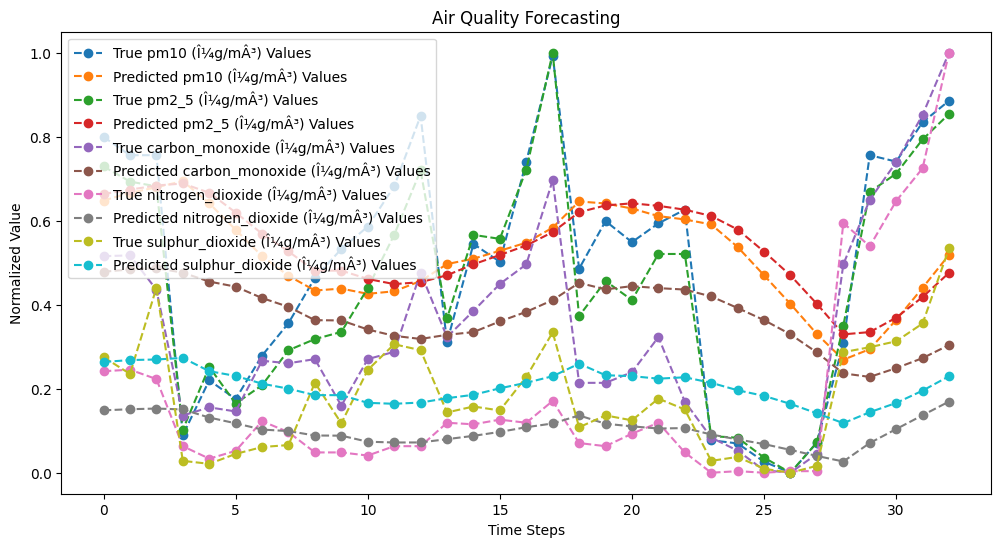

In [ ]:

# Plot forecasting graph
plt.figure(figsize=(12, 6))

for i, feature in enumerate(features):
    plt.plot(y_test[:, i], label=f'True {feature} Values', linestyle='--', marker='o')
    plt.plot(predictions[:, i], label=f'Predicted {feature} Values', linestyle='--', marker='o')

plt.title('Air Quality Forecasting')
plt.xlabel('Time Steps')
plt.ylabel('Normalized Value')
plt.legend()
plt.show()

**Model Saving**

In [ ]:
model.save("/content/drive/MyDrive/CLENTS/AIR_Quality_Forcasting.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# **Model 3**

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/CLENTS/dataset_02OCT-06OCT.xlsx")

In [ ]:
df.sample(11)

Sr.No   latitude  longitude  location_id              time  \
79      80  33.351357  72.774734           15  2023-10-06T10:00   
91      92  31.975508  74.223801           18  2023-10-03T10:00   
110    111  31.452097  73.708305           22  2023-10-02T10:00   
3        4  31.345394  73.429810           35  2023-10-05T10:00   
68      69  30.808500  73.459396           13  2023-10-05T10:00   
40      41  32.337006  74.903336            8  2023-10-02T10:00   
115    116  32.571144  74.075005           23  2023-10-02T10:00   
164    165  30.535133  72.699539           32  2023-10-06T10:00   
148    149  33.783184  72.723076           29  2023-10-05T10:00   
161    162  30.535133  72.699539           32  2023-10-03T10:00   
9       10  30.181459  71.492157            1  2023-10-06T10:00   

     pm10 (Î¼g/mÂ³)  pm2_5 (Î¼g/mÂ³)  carbon_monoxide (Î¼g/mÂ³)  \
79             52.6             26.0                        243   
91             59.8             32.8                        312   
110            28.0             16.1                        245   
3              74.0             38.2                        341   
68             68.2             34.7                        300   
40             32.9             21.2                        288   
115            26.0             16.0                        242   
164            64.7             31.5                        218   
148            32.8             15.0                        268   
161            62.2             28.1                        241   
9              65.9             32.0                        219   

     nitrogen_dioxide (Î¼g/mÂ³)  sulphur_dioxide (Î¼g/mÂ³)  ozone (Î¼g/mÂ³)  
79                          2.0                        8.0              160  
91                          3.6                        8.4              151  
110                         4.8                        2.1              134  
3                           3.2                        5.9              158  
68                          2.4                        5.2              150  
40                          4.6                        3.8              152  
115                         3.1                        3.6              135  
164                         1.6                        7.2              139  
148                         3.6                        3.4              162  
161                         2.0                        6.6              137  
9                           2.7                       13.7              148

In [ ]:
df.tail()

Sr.No   latitude  longitude  location_id              time  \
170    171  31.621113  74.282364           34  2023-10-02T10:00   
171    172  31.621113  74.282364           34  2023-10-03T10:00   
172    173  31.621113  74.282364           34  2023-10-04T10:00   
173    174  31.621113  74.282364           34  2023-10-05T10:00   
174    175  31.621113  74.282364           34  2023-10-06T10:00   

     pm10 (Î¼g/mÂ³)  pm2_5 (Î¼g/mÂ³)  carbon_monoxide (Î¼g/mÂ³)  \
170            35.5             22.5                        386   
171            76.6             39.3                        465   
172            75.2             41.6                        511   
173            83.8             45.9                        569   
174            88.5             49.1                        645   

     nitrogen_dioxide (Î¼g/mÂ³)  sulphur_dioxide (Î¼g/mÂ³)  ozone (Î¼g/mÂ³)  
170                        16.3                       13.0              163  
171                        14.8                       13.5              165  
172                        17.7                       14.1              170  
173                        19.8                       15.9              197  
174                        27.2                       23.5              224

In [ ]:
df["latitude"].unique()

array([31.345394, 30.181459, 30.032486, 32.555496, 30.448601, 31.976515,
       30.767956, 30.677717, 32.337006, 30.286415, 34.015858, 32.071697,
       30.045246, 30.8085  , 33.768051, 33.351357, 32.588169, 30.074377,
       31.975508, 32.082466, 31.025009, 32.265396, 31.452097, 32.571144,
       31.831667, 32.940548, 32.136673, 32.166351, 31.716661, 33.783184,
       30.705557, 32.099476, 30.535133, 34.359688, 31.621113])

In [ ]:
df["longitude"].unique()

array([73.42981 , 71.492157, 70.640244, 73.194351, 73.697578, 74.222015,
       72.437813, 73.106812, 74.903336, 71.93203 , 71.975449, 73.68573 ,
       72.348869, 73.459396, 72.360703, 72.774734, 73.497345, 71.184654,
       74.223801, 72.669128, 73.847878, 72.905388, 73.708305, 74.075005,
       73.623055, 73.727631, 74.012383, 74.1959  , 73.985023, 72.723076,
       70.657776, 74.874733, 72.699539, 73.471054, 74.282364])

In [ ]:
df["location_id"].unique()

array([35,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34])

In [ ]:
df["time"].unique()

array(['2023-10-02T10:00', '2023-10-03T10:00', '2023-10-04T10:00',
       '2023-10-05T10:00', '2023-10-06T10:00'], dtype=object)

In [ ]:
df.columns

Index(['Sr.No', 'latitude', 'longitude', 'location_id', 'time',
       'pm10 (Î¼g/mÂ³)', 'pm2_5 (Î¼g/mÂ³)', 'carbon_monoxide (Î¼g/mÂ³)',
       'nitrogen_dioxide (Î¼g/mÂ³)', 'sulphur_dioxide (Î¼g/mÂ³)',
       'ozone (Î¼g/mÂ³)'],
      dtype='object')

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import EarlyStopping

Epoch 1/50
4/4 [==============================] - 5s 162ms/step - loss: 0.1636 - val_loss: 0.1371
Epoch 2/50
4/4 [==============================] - 0s 16ms/step - loss: 0.0955 - val_loss: 0.0583
Epoch 3/50
4/4 [==============================] - 0s 13ms/step - loss: 0.0509 - val_loss: 0.0196
Epoch 4/50
4/4 [==============================] - 0s 12ms/step - loss: 0.0394 - val_loss: 0.0211
Epoch 5/50
4/4 [==============================] - 0s 12ms/step - loss: 0.0419 - val_loss: 0.0251
Epoch 6/50
4/4 [==============================] - 0s 15ms/step - loss: 0.0379 - val_loss: 0.0257
Epoch 7/50
4/4 [==============================] - 0s 13ms/step - loss: 0.0341 - val_loss: 0.0285
Epoch 8/50
2/2 [==============================] - 0s 8ms/step - loss: 0.0774
Test Loss (MSE): 0.07737970352172852
2/2 [==============================] - 0s 7ms/step
Mean Squared Error (MSE): 0.07737970351892794
Mean Absolute Error (MAE): 0.22094739447950992
R-squared (R2): -0.13392235734530714


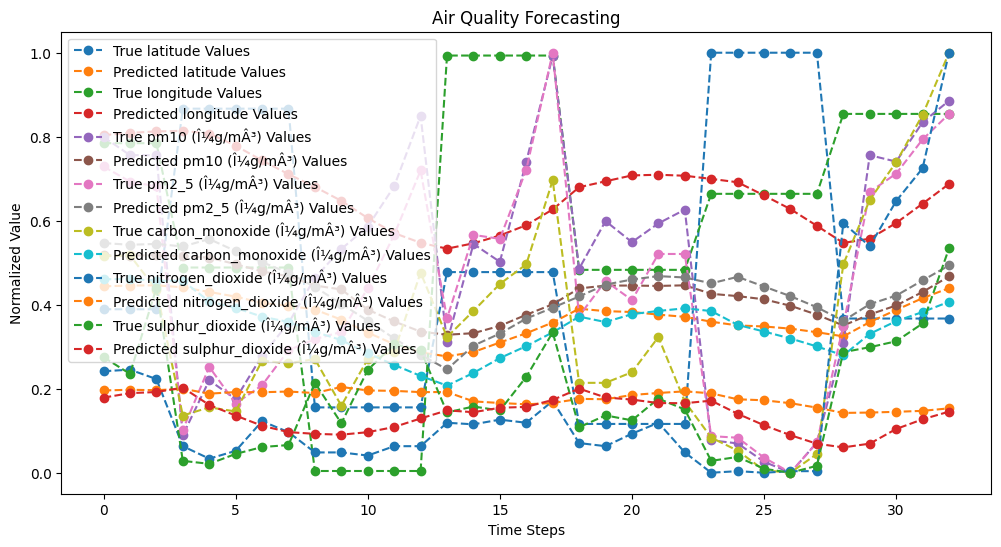

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import folium
import pandas as pd


df = pd.read_excel("/content/drive/MyDrive/CLENTS/dataset_02OCT-06OCT.xlsx")

# 'time' column is in datetime format
df['time'] = pd.to_datetime(df['time'])
df.set_index('time', inplace=True)

latitude_column = 'latitude'
longitude_column = 'longitude'

# Add latitude and longitude to the features list
features = [latitude_column, longitude_column, 'pm10 (Î¼g/mÂ³)', 'pm2_5 (Î¼g/mÂ³)', 'carbon_monoxide (Î¼g/mÂ³)',
            'nitrogen_dioxide (Î¼g/mÂ³)', 'sulphur_dioxide (Î¼g/mÂ³)']




# Normalize data using Min-Max scaling
scaler = MinMaxScaler()
df[features] = scaler.fit_transform(df[features])



# Create sequences for time series data
sequence_length = 10
sequences = []
targets = []

for i in range(len(df) - sequence_length):
    seq = df.iloc[i:i + sequence_length][features].values
    target = df.iloc[i + sequence_length][features].values
    sequences.append(seq)
    targets.append(target)

X = np.array(sequences)
y = np.array(targets)

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(X.shape[1], X.shape[2])))
model.add(Dense(len(features), activation='linear'))



# Compile the model
model.compile(optimizer='adam', loss='mse')

# Set up early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, callbacks=[early_stopping])


# Evaluate the model on the test set
loss = model.evaluate(X_test, y_test)
print(f"Test Loss (MSE): {loss}")


# Make predictions
predictions = model.predict(X_test)


# Calculate additional metrics
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)


print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")


# Plot forecasting graph
plt.figure(figsize=(12, 6))

for i, feature in enumerate(features):
    plt.plot(y_test[:, i], label=f'True {feature} Values', linestyle='--', marker='o')
    plt.plot(predictions[:, i], label=f'Predicted {feature} Values', linestyle='--', marker='o')

plt.title('Air Quality Forecasting')
plt.xlabel('Time Steps')
plt.ylabel('Normalized Value')
plt.legend()
plt.show()


In [ ]:
# Assuming your DataFrame has the latitude and longitude columns
map_center = [df[longitude_column].mean(),df[latitude_column].mean()]
mymap = folium.Map(location=map_center, zoom_start=12)

# Plot true and predicted values on the map
for i in range(len(y_test)):
    true_values = y_test[i, :]
    predicted_values = predictions[i, :]
    location = [df.iloc[train_size + i][longitude_column], df.iloc[train_size + i][latitude_column]]

    # Plot true values
    folium.Marker(location, popup=f'True Values: {true_values}', icon=folium.Icon(color='blue')).add_to(mymap)

    # Plot predicted values
    folium.Marker(location, popup=f'Predicted Values: {predicted_values}', icon=folium.Icon(color='red')).add_to(mymap)

# Save the map to an HTML file
mymap.save('Forecast_map.html')